In [2]:
import boto3
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

### data

In [3]:
client = boto3.client('s3')

In [4]:
s3_prefix = 's3://'
bucket = 'sisyphus-general-bucket'
primary_folder = 'AthenaInsights'

In [5]:
# response = client.list_objects_v2(
#     Bucket=bucket,
#     Prefix=f'{primary_folder}/data/data_prep/')

# paths = []
# for content in response.get('Contents', []):
#     # print(f"{s3_prefix}{bucket}/{content['Key']}")
#     paths.append(f"{s3_prefix}{bucket}/{content['Key']}")
# [z for z in paths if '1m' in z]

In [6]:
# spy_1m_df_loc = f'{s3_prefix}{bucket}/{primary_folder}/data/data_prep/stock_bars_1min.parquet'
spy_1m_df_loc = 's3://sisyphus-general-bucket/AthenaInsights/latest_data/feature_prep/stock_bars_1min_base.parquet'
spy_1m_df = pd.read_parquet(spy_1m_df_loc)
spy_1m_df = spy_1m_df[spy_1m_df.symbol=='SPY']

In [7]:
# spy_1m_df_loc = f'{s3_prefix}{bucket}/{primary_folder}/data/data_prep/stock_bars_1min.parquet'
spy_1m_df_diff_loc = 's3://sisyphus-general-bucket/AthenaInsights/latest_data/feature_prep/stock_bars_1min_diff.parquet'
spy_1m_df_diff = pd.read_parquet(spy_1m_df_diff_loc)
spy_1m_df_diff = spy_1m_df_diff[spy_1m_df_diff.symbol=='SPY']

In [8]:
spy_1m_df.shape, spy_1m_df.columns

((214794, 87),
 Index(['open', 'high', 'low', 'close', 'volume', 'symbol', 'time_delta',
        'open_ema_2m', 'open_sma_2m', 'high_ema_2m', 'high_sma_2m',
        'low_ema_2m', 'low_sma_2m', 'close_ema_2m', 'close_sma_2m',
        'volume_ema_2m', 'volume_sma_2m', 'open_ema_3m', 'open_sma_3m',
        'high_ema_3m', 'high_sma_3m', 'low_ema_3m', 'low_sma_3m',
        'close_ema_3m', 'close_sma_3m', 'volume_ema_3m', 'volume_sma_3m',
        'open_ema_5m', 'open_sma_5m', 'high_ema_5m', 'high_sma_5m',
        'low_ema_5m', 'low_sma_5m', 'close_ema_5m', 'close_sma_5m',
        'volume_ema_5m', 'volume_sma_5m', 'open_ema_8m', 'open_sma_8m',
        'high_ema_8m', 'high_sma_8m', 'low_ema_8m', 'low_sma_8m',
        'close_ema_8m', 'close_sma_8m', 'volume_ema_8m', 'volume_sma_8m',
        'open_ema_12m', 'open_sma_12m', 'high_ema_12m', 'high_sma_12m',
        'low_ema_12m', 'low_sma_12m', 'close_ema_12m', 'close_sma_12m',
        'volume_ema_12m', 'volume_sma_12m', 'open_ema_10m', 'open_sma_1

In [9]:
spy_1m_df.tail(20).T

us_eastern_timestamp,2024-11-19 19:40:00,2024-11-19 19:41:00,2024-11-19 19:42:00,2024-11-19 19:43:00,2024-11-19 19:44:00,2024-11-19 19:45:00,2024-11-19 19:46:00,2024-11-19 19:47:00,2024-11-19 19:48:00,2024-11-19 19:49:00,2024-11-19 19:50:00,2024-11-19 19:51:00,2024-11-19 19:52:00,2024-11-19 19:53:00,2024-11-19 19:54:00,2024-11-19 19:55:00,2024-11-19 19:56:00,2024-11-19 19:57:00,2024-11-19 19:58:00,2024-11-19 19:59:00
open,591.56,591.56,591.56,591.6,591.64,591.64,591.66,591.63,591.67,591.67,591.68,591.6,591.58,591.66,591.53,591.53,591.52,591.46,591.4,591.39
high,591.56,591.56,591.56,591.63,591.64,591.65,591.66,591.63,591.67,591.67,591.68,591.6099,591.58,591.66,591.53,591.53,591.54,591.46,591.4,591.4
low,591.56,591.56,591.56,591.6,591.64,591.63,591.65,591.63,591.67,591.67,591.63,591.6,591.58,591.55,591.5,591.5,591.48,591.41,591.35,591.35
close,591.56,591.56,591.56,591.63,591.64,591.63,591.65,591.63,591.67,591.67,591.63,591.6099,591.58,591.55,591.52,591.52,591.48,591.42,591.39,591.39
volume,222.0,222.0,222.0,325.0,1824.0,2300.0,701.0,250.0,159.0,159.0,1473.0,963.0,597.0,1559.0,1052.0,1052.0,3823.0,3656.0,1354.0,2567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
low_sma_26m,590.81,590.84,590.87,590.901538,590.934615,590.967308,591.000769,591.033462,591.067692,591.101923,591.134615,591.166154,591.196923,591.226538,591.254231,591.281923,591.308846,591.333077,591.355,591.376923
close_ema_26m,590.918402,590.965928,591.009933,591.055864,591.099133,591.138457,591.176349,591.209953,591.24403,591.275584,591.301837,591.324656,591.343571,591.358862,591.370798,591.38185,591.38912,591.391408,591.391303,591.391207
close_sma_26m,590.896538,590.923077,590.949615,590.978846,591.008462,591.037692,591.067692,591.096923,591.127692,591.158462,591.187692,591.21615,591.243458,591.269612,591.294612,591.319612,591.343073,591.364227,591.384227,591.404227
volume_ema_26m,967.885989,912.635175,861.477014,821.737976,895.979607,999.981118,977.834368,923.920711,867.259918,814.79622,863.552056,870.91857,850.628306,903.100283,914.129892,924.342492,1139.057863,1325.498022,1327.609279,1419.415999


In [10]:
# Check if the Datetime index is sorted
if spy_1m_df.index.is_monotonic_increasing:
    print("The index is sorted.")
else:
    print("The index is not sorted. Sorting now.")
    spy_1m_df.sort_index(inplace=True)


The index is sorted.


In [11]:
# Define the percentage threshold for categorizing reversals
threshold_percentage = 0.03 / 100  # converting percentage to a decimal

# Function to calculate rolling highs and lows
def calculate_rolling_window(df, window=30):
    rolling_high = df['high'].rolling(window=window, min_periods=1).max().shift(-window)
    rolling_low = df['low'].rolling(window=window, min_periods=1).min().shift(-window)
    return rolling_high, rolling_low

# Calculate rolling highs and lows for the next 30 minutes
spy_1m_df['future_high'], spy_1m_df['future_low'] = calculate_rolling_window(spy_1m_df)

# Function to determine category based on thresholds
def categorize_reversals(row):
    current_close = row['close']
    future_high = row['future_high']
    future_low = row['future_low']

    # Check for upward reversal
    if future_high >= current_close * (1 + threshold_percentage):
        return 'A'  # Potential Upward Reversal
    # Check for downward reversal
    elif future_low <= current_close * (1 - threshold_percentage):
        return 'B'  # Potential Downward Reversal
    else:
        return 'C'  # Undecided

# Apply categorization to each row
spy_1m_df['category'] = spy_1m_df.apply(categorize_reversals, axis=1)


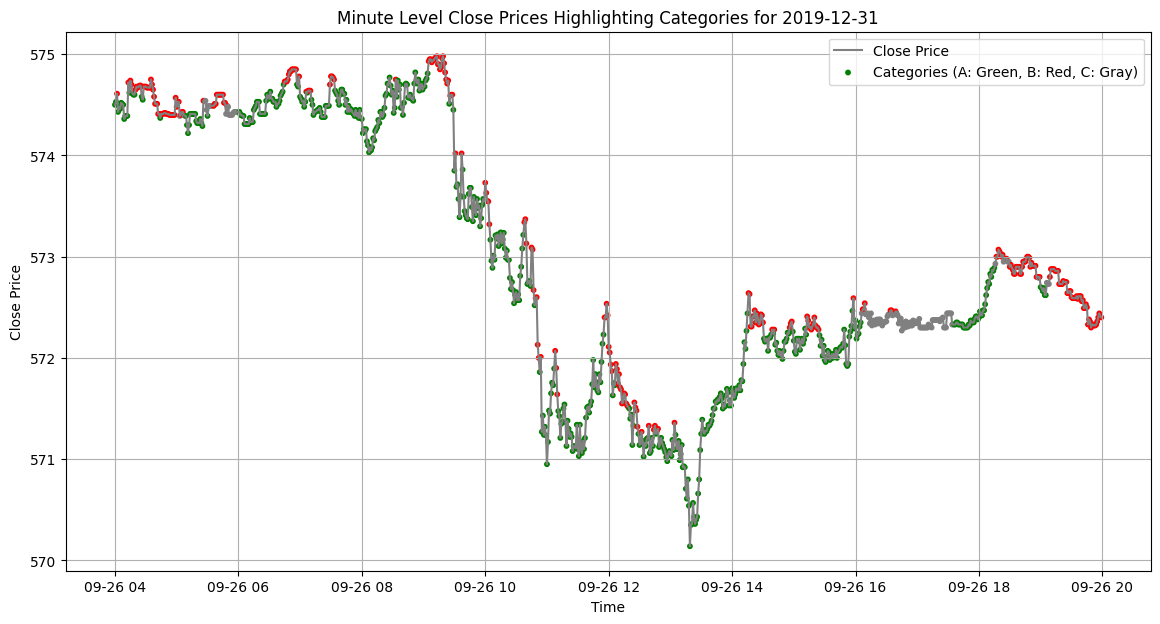

In [12]:
import matplotlib.pyplot as plt

# Filter the dataframe for a specific day, e.g., 2019-12-31
specific_day_df = spy_1m_df.loc['2024-09-26']

# Prepare colors based on categories
colors = specific_day_df['category'].map({'A': 'green', 'B': 'red', 'C': 'gray'})

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(specific_day_df.index, specific_day_df['close'], label='Close Price', color='gray')
plt.scatter(specific_day_df.index, specific_day_df['close'], color=colors, s=10, label='Categories (A: Green, B: Red, C: Gray)')
plt.title('Minute Level Close Prices Highlighting Categories for 2019-12-31')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


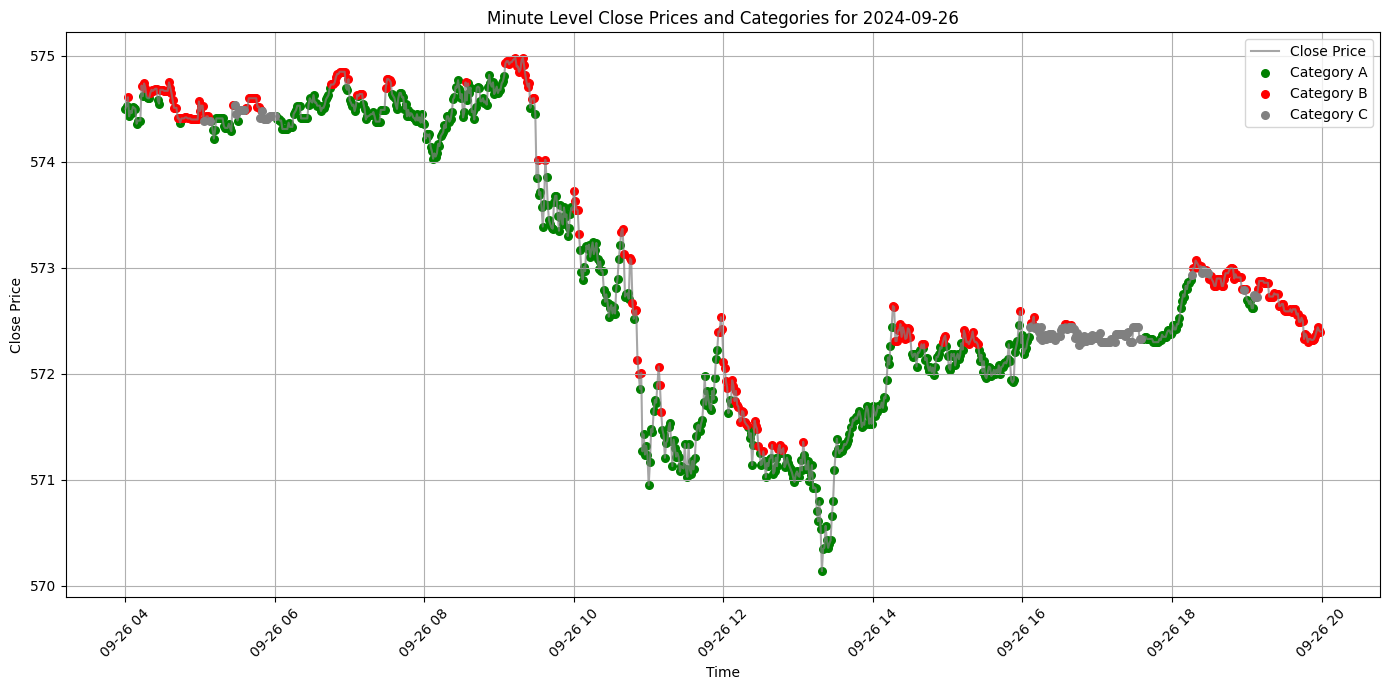

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'spy_1m_df' is already loaded and processed with the 'category' column added
# Filter for a specific day and only when the market is open
date_to_plot = '2024-09-26'
daily_data = spy_1m_df[(spy_1m_df.index.date == pd.to_datetime(date_to_plot).date())]

# Plotting the close prices for the day
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['close'], label='Close Price', color='gray', alpha=0.7)

# Highlight categories
for category, color in zip(['A', 'B', 'C'], ['green', 'red', 'gray']):
    cat_data = daily_data[daily_data['category'] == category]
    plt.scatter(cat_data.index, cat_data['close'], color=color, label=f'Category {category}', s=30)  # s is the marker size

plt.title(f'Minute Level Close Prices and Categories for {date_to_plot}')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
', '.join([z for z in spy_1m_df.columns if 'close' in z])

'close, close_ema_2m, close_sma_2m, close_ema_3m, close_sma_3m, close_ema_5m, close_sma_5m, close_ema_8m, close_sma_8m, close_ema_12m, close_sma_12m, close_ema_10m, close_sma_10m, close_ema_20m, close_sma_20m, close_ema_26m, close_sma_26m'

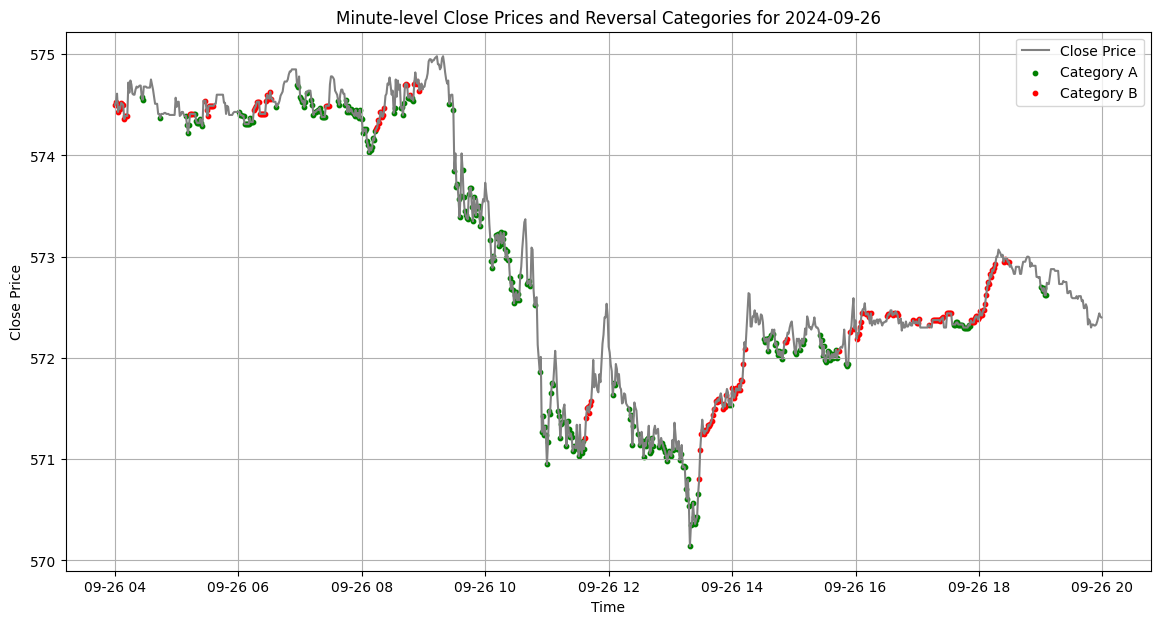

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data load (ensure your 'spy_1m_df' is already loaded with this kind of structure)
# spy_1m_df = pd.read_csv('data.csv', parse_dates=['us_eastern_timestamp'], index_col='us_eastern_timestamp')

# Select a specific day's data
date_to_analyze = '2024-09-26'
daily_data = spy_1m_df.loc[date_to_analyze]

# Calculate the Simple Moving Average (SMA) for the 20-minute window
# daily_data['20_min_sma'] = daily_data['Close'].rolling(window=20).mean()

# Determine the trend for Category A and B conditions
daily_data['trend_A'] = daily_data['close'] < daily_data['close_sma_20m']  # True if downtrend
daily_data['trend_B'] = daily_data['close'] > daily_data['close_sma_20m']  # True if uptrend

# Calculate potential high and low in the next 30 minutes
daily_data['future_high'] = daily_data['high'].rolling(window=30, min_periods=1).max().shift(-30)
daily_data['future_low'] = daily_data['low'].rolling(window=30, min_periods=1).min().shift(-30)

# Define the reversal thresholds
threshold = 0.0003  # 0.03%
daily_data['close_future_high_diff'] = (daily_data['future_high'] - daily_data['close']) / daily_data['close']
daily_data['close_future_low_diff'] = (daily_data['future_low'] - daily_data['close']) / daily_data['close']

# Identify Category A and B conditions
daily_data['category'] = np.where(
    (daily_data['trend_A'] & (daily_data['close_future_high_diff'] > threshold)), 'A',
    np.where(
        (daily_data['trend_B'] & (daily_data['close_future_low_diff'] > -threshold)), 'B',
        'C'
    )
)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['close'], label='Close Price', color='gray')

# Highlight categories
for category in ['A', 'B']:
    indices = daily_data[daily_data['category'] == category].index
    colors = {'A': 'green', 'B': 'red'}
    plt.scatter(indices, daily_data.loc[indices, 'close'], color=colors[category], label=f'Category {category}', s=10)

plt.title(f'Minute-level Close Prices and Reversal Categories for {date_to_analyze}')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


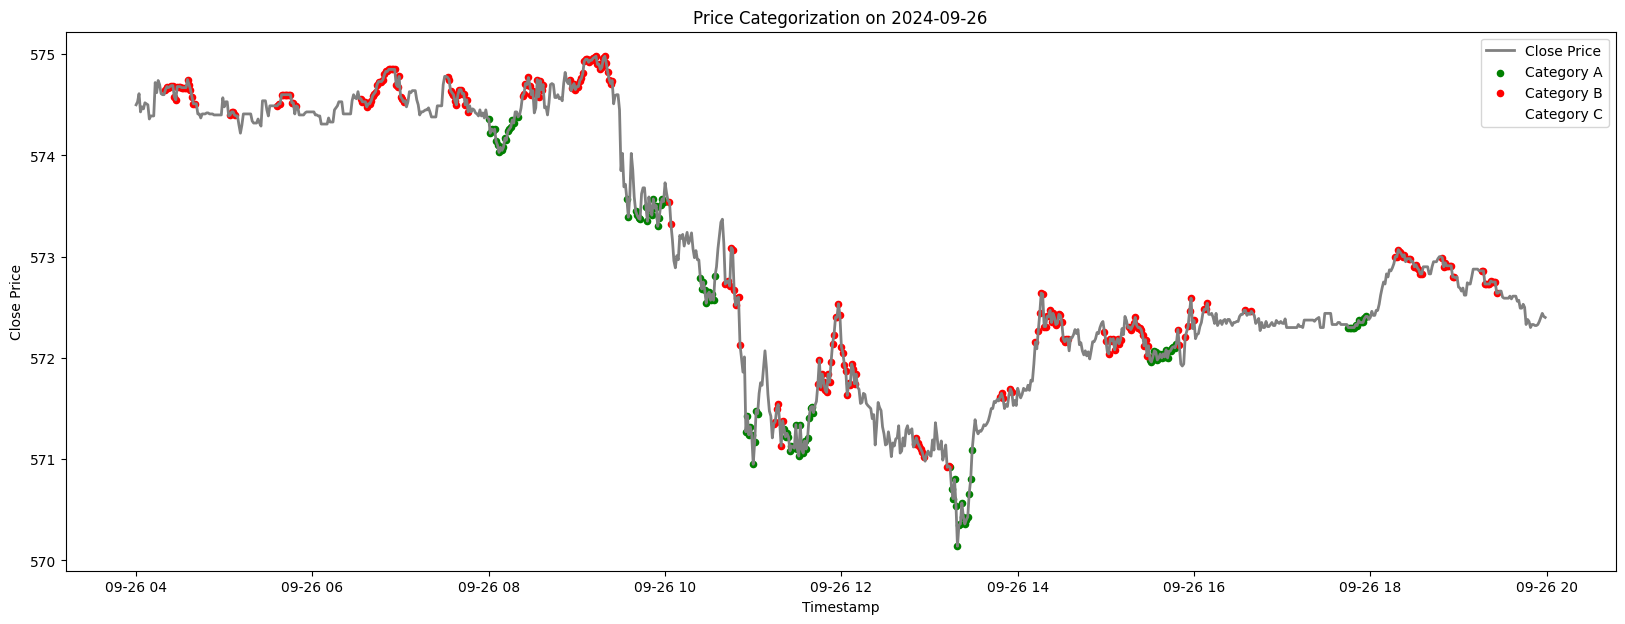

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def calculate_trend_slope(df, window=20, field='close'):
    """ Calculate the slope of the linear regression line for the last 'window' minutes """
    reg = LinearRegression()
    # Indices for X, close prices for Y
    x = np.array(range(window)).reshape(-1, 1)
    y = df[field].values.reshape(-1, 1)
    reg.fit(x, y)
    # Slope of the regression line
    return reg.coef_[0][0]

def categorize_points(df, slope_threshold=0.1, high_low_threshold=0.3, field='close'):
    """ Categorize each minute data point into A, B, or C """
    categories = []
    for i in range(len(df)):
        if i < 20 or i > len(df) - 31:  # Not enough data to categorize
            categories.append('C')  # Consider as undecided for now
            continue
        
        # Calculate the trend over the past 20 minutes
        past_trend_slope = calculate_trend_slope(df.iloc[i-20:i], field=field)
        
        # Get the current close price and high/low over the next 30 minutes
        current_close = df.iloc[i]['close']
        future_high = df.iloc[i+1:i+31]['high'].max()
        future_low = df.iloc[i+1:i+31]['low'].min()
        
        # Calculate thresholds
        high_threshold = current_close * (1 + high_low_threshold) # 1.0003 # 
        low_threshold = current_close * 0.9997 # (1 - high_low_threshold)
        
        # Determine the category based on the criteria
        if past_trend_slope < (-1*slope_threshold) and future_high > high_threshold: # 
            # print('A', past_trend_slope)
            categories.append('A')
        elif past_trend_slope > (slope_threshold) and future_low < low_threshold: # 
            # print('B', past_trend_slope)
            categories.append('B')
        else:
            # print('C', past_trend_slope)
            categories.append('C')
    
    return categories

def plot_categorization(df, date, slope_threshold=0.1, high_low_threshold=0.3):
    """ Plot categorization for a given day """
    df_day = df.loc[date]
    categories = categorize_points(df_day, slope_threshold, high_low_threshold, field='close_ema_5m')
    df_day['category'] = categories
    
    plt.figure(figsize=(20, 7))
    # df_day.to_csv('df_day.csv')
    plt.plot(df_day.index, df_day['close'], label='Close Price', color='gray', linewidth=2)
    for cat, color in zip(['A', 'B', 'C'], ['green', 'red', 'gray']):
        plt.scatter(df_day[df_day['category'] == cat].index, df_day[df_day['category'] == cat]['close'], color=color, label=f'Category {cat}', s=20 if cat!='C' else 0)
    # plt.plot(df_day.index, df_day['close_ema_3m'], label='Close Price', color='blue', )
    plt.legend()
    plt.title(f'Price Categorization on {date}')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price')
    # plt.xticks (df_day.index[::20].strftime('%H-%M'), rotation=90)
    plt.show()

# Assuming 'spy_1m_df' is already loaded and indexed properly with datetime
plot_categorization(spy_1m_df, '2024-09-26', slope_threshold=0, high_low_threshold=0.001)

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def calculate_trend_slope(df, window=20, field='close'):
    """ Calculate the slope of the linear regression line for the last 'window' minutes based on a specified field """
    reg = LinearRegression()
    # Indices for X, specified field values for Y
    x = np.array(range(window)).reshape(-1, 1)
    y = df[field].values.reshape(-1, 1)
    reg.fit(x, y)
    # Slope of the regression line
    return reg.coef_[0][0]

def categorize_points(df, field='close', prev_data_points=20, positive_slope_threshold=0.0, negative_slope_threshold=0.0, positive_rise_threshold=0.0003, negative_drop_threshold=0.0003, positive_future_window=30, negative_future_window=30):
    """ Categorize each minute data point into A, B, or C with dynamic thresholds and fields """
    categories = []
    for i in range(len(df)):
        if i < prev_data_points or i > len(df) - max(positive_future_window, negative_future_window):  # Not enough data to categorize
            categories.append('C')  # Consider as undecided for now
            continue
        
        # Calculate the trend over the past 20 minutes using the specified field
        past_trend_slope = calculate_trend_slope(df.iloc[i-prev_data_points:i], window=prev_data_points,field=field)
        
        # Get the current price and future high/low based on the specified field
        current_price = df.iloc[i][field]
        future_high = df.iloc[i+1:i+1+positive_future_window][field].max()
        future_low = df.iloc[i+1:i+1+negative_future_window][field].min()
        
        # Calculate thresholds based on current price
        high_threshold = current_price * (1 + positive_rise_threshold)
        low_threshold = current_price * (1 - negative_drop_threshold)
        
        # Determine the category based on the criteria and trend
        if past_trend_slope < negative_slope_threshold and future_high > high_threshold:
            categories.append('A')
        elif past_trend_slope > positive_slope_threshold and future_low < low_threshold:
            categories.append('B')
        else:
            categories.append('C')
    
    return categories

def plot_categorization(df, date, field='close', **kwargs):
    """ Plot categorization for a given day with dynamic field selection """
    df_day = df.loc[date]
    categories = categorize_points(df_day, field=field, **kwargs)
    df_day['category'] = categories
    
    plt.figure(figsize=(14, 7))
    plt.plot(df_day.index, df_day[field], label=f'{field.capitalize()} Price', color='gray', linewidth=2)
    # plt.plot(df_day.index, df_day['close'], label=f'{field.capitalize()} Price', color='blue', linewidth=1)
    for cat, color in zip(['A', 'B', 'C'], ['green', 'red', 'gray']):
        plt.scatter(df_day[df_day['category'] == cat].index, df_day[df_day['category'] == cat][field], color=color, label=f'Category {cat}', s=20 if cat!='C' else 0)
    plt.legend()
    plt.title(f'Price Categorization on {date}')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{field.capitalize()} Price')
    plt.grid()
    plt.show()

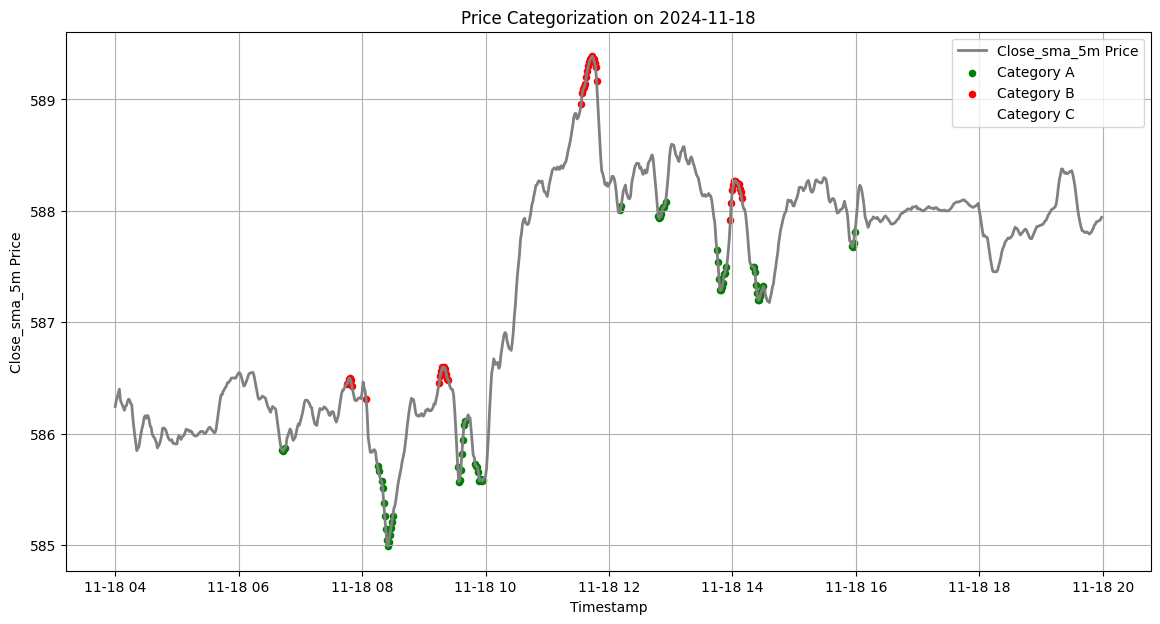

In [ ]:
# # Example usage with customizable options:
# plot_categorization(spy_1m_df, '2021-09-28', field='close_sma_5m', 
#                     # prev_data_points=9,
#                     prev_data_points=11,
#                     positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
#                     positive_rise_threshold=0.0007, negative_drop_threshold=0.001, 
#                     positive_future_window=30, negative_future_window=30)

# Example usage with customizable options:
# plot_categorization(spy_1m_df, '2022-02-25', field='close_sma_5m', 
#                     # prev_data_points=9,
#                     prev_data_points=11,
#                     positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
#                     positive_rise_threshold=0.0007, negative_drop_threshold=0.002, 
#                     positive_future_window=30, negative_future_window=30)

# plot_categorization(spy_1m_df, '2021-09-28', field='close_sma_5m', 
#                     # prev_data_points=9,
#                     prev_data_points=11,
#                     positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
#                     positive_rise_threshold=0.0007, negative_drop_threshold=0.001, 
#                     positive_future_window=30, negative_future_window=30)

start_date = '2024-11-05'
end_date = '2024-11-11'
business_days = pd.bdate_range(start=start_date, end=end_date)
date_filter = pd.Timestamp(np.random.choice(business_days)).strftime('%Y-%m-%d')
print(date_filter)
plot_categorization(spy_1m_df, date_filter, field='close_sma_5m', 
                    # prev_data_points=9,
                    prev_data_points=11,
                    positive_slope_threshold=0.013, negative_slope_threshold=-0.026, 
                    positive_rise_threshold=0.0007, negative_drop_threshold=0.0012, 
                    positive_future_window=30, negative_future_window=30)

In [27]:
spy_1m_df.loc[date_filter]

,open,high,low,close,volume,symbol,time_delta,open_ema_2m,open_sma_2m,high_ema_2m,...,high_sma_26m,low_ema_26m,low_sma_26m,close_ema_26m,close_sma_26m,volume_ema_26m,volume_sma_26m,future_high,future_low,category
us_eastern_timestamp,,,,,,,,,,,,,,,,,,,,,
2024-11-07 04:00:00,591.9500,592.1900,591.95,591.95,4078.0,SPY,NaN,591.489440,591.26000,591.650480,...,590.649208,590.662240,590.610800,590.676594,590.623850,2251.259842,1661.076923,592.59,591.82,A
2024-11-07 04:01:00,591.9300,591.9300,591.93,591.93,531.0,SPY,NaN,591.783147,591.94000,591.836827,...,590.699592,590.756148,590.661954,590.769439,590.674235,2123.833187,1636.846154,592.59,591.82,A
2024-11-07 04:02:00,591.9900,591.9900,591.99,591.99,576.0,SPY,NaN,591.921049,591.96000,591.938942,...,590.752285,590.847545,590.715415,590.859851,590.726927,2009.178877,1614.346154,592.59,591.82,A
2024-11-07 04:03:00,591.8500,591.8900,591.85,591.89,1980.0,SPY,NaN,591.873683,591.92000,591.906314,...,590.796515,590.921801,590.758108,590.936158,590.771158,2007.017479,1677.730769,592.59,591.82,A
2024-11-07 04:04:00,591.8900,591.9000,591.82,591.84,5489.0,SPY,NaN,591.884561,591.87000,591.902105,...,590.842669,590.988334,590.801185,591.003109,590.815004,2264.942110,1882.076923,592.59,591.91,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-07 19:55:00,595.7499,595.7500,595.72,595.72,988.0,SPY,NaN,595.759152,595.74995,595.759218,...,595.890000,595.871265,595.868462,595.878144,595.878077,765.586599,806.115385,596.68,595.71,A
2024-11-07 19:56:00,595.7500,595.7500,595.73,595.73,2630.0,SPY,NaN,595.753051,595.74995,595.753073,...,595.883077,595.860801,595.860769,595.867170,595.870385,903.691295,900.961538,596.68,595.71,A
2024-11-07 19:57:00,595.7400,595.7500,595.74,595.75,448.0,SPY,NaN,595.744350,595.74500,595.751024,...,595.876154,595.851853,595.853462,595.858491,595.863462,869.936384,911.884615,596.68,595.71,A


In [37]:
spy_1m_df_diff

,open_diff,high_diff,low_diff,close_diff,volume_diff,symbol,time_delta,open_diff_ema_2m,open_diff_sma_2m,high_diff_ema_2m,...,open_diff_ema_26m,open_diff_sma_26m,high_diff_ema_26m,high_diff_sma_26m,low_diff_ema_26m,low_diff_sma_26m,close_diff_ema_26m,close_diff_sma_26m,volume_diff_ema_26m,volume_diff_sma_26m
us_eastern_timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-02 04:00:00,NaN,NaN,NaN,NaN,NaN,SPY,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02 04:01:00,0.09,-0.02,0.29,-0.02,-14091.0,SPY,NaN,0.090000,NaN,-0.020000,...,0.090000,NaN,-0.020000,NaN,0.290000,NaN,-0.020000,NaN,-14091.000000,NaN
2024-01-02 04:02:00,-0.05,-0.05,-0.01,-0.01,-217.0,SPY,NaN,-0.003333,0.020,-0.040000,...,0.079630,NaN,-0.022222,NaN,0.267778,NaN,-0.019259,NaN,-13063.296296,NaN
2024-01-02 04:03:00,-0.02,-0.02,-0.01,-0.01,-5783.0,SPY,NaN,-0.014444,-0.035,-0.026667,...,0.072250,NaN,-0.022058,NaN,0.247202,NaN,-0.018573,NaN,-12524.015089,NaN
2024-01-02 04:04:00,0.00,0.00,0.00,0.00,0.0,SPY,NaN,-0.004815,-0.010,-0.008889,...,0.066898,NaN,-0.020424,NaN,0.228890,NaN,-0.017198,NaN,-11596.310268,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-19 19:55:00,0.00,0.00,0.00,0.00,0.0,SPY,NaN,-0.024078,-0.065,-0.024241,...,0.013091,0.028846,0.010886,0.025385,0.011859,0.027692,0.011052,0.025000,10.212601,1.346154
2024-11-19 19:56:00,-0.01,0.01,-0.02,-0.04,2771.0,SPY,NaN,-0.014693,-0.005,-0.001414,...,0.011381,0.028462,0.010820,0.025769,0.009499,0.026923,0.007270,0.023462,214.715371,107.923077
2024-11-19 19:57:00,-0.06,-0.08,-0.07,-0.06,-167.0,SPY,NaN,-0.044898,-0.035,-0.053805,...,0.006094,0.026154,0.004093,0.022692,0.003610,0.024231,0.002287,0.021154,186.440158,101.500000
